# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>

## <b> Credentials: </b> (E-JUST Submission)
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Group: 1
- Section: AID 3

## <b> Notebook Workflow: </b>
- Environment Setup
- Data Pre-processing
- Data Visualization
- Model Definition
- Training the Model
- Prediction

## <b> Introduction: </b>
<p> In this notebook, a model is to be trained to <b> recognize/classify arabic letters </b> using a convolutional neural network (CNN) through Keras, a TensorFlow tool. </p>

## <b> Dataset: </b>
https://www.kaggle.com/competitions/arabic-letters-classification

## Environment Setup:
### Importing Packages

In [34]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

### GPU Checkup:
Kaggle provides 2 GPUs which are relied upon heavily during the training phase.

In [35]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


### Loading the Dataset(s):

In [36]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 50

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

In [37]:
# str = "user001_heh_middle_042.png"
# str[8:18]

## Data Pre-processing:
Splitting training data into 'Training' and 'Validation' for the model to train on.

In [38]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [39]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


## Data Visualization:

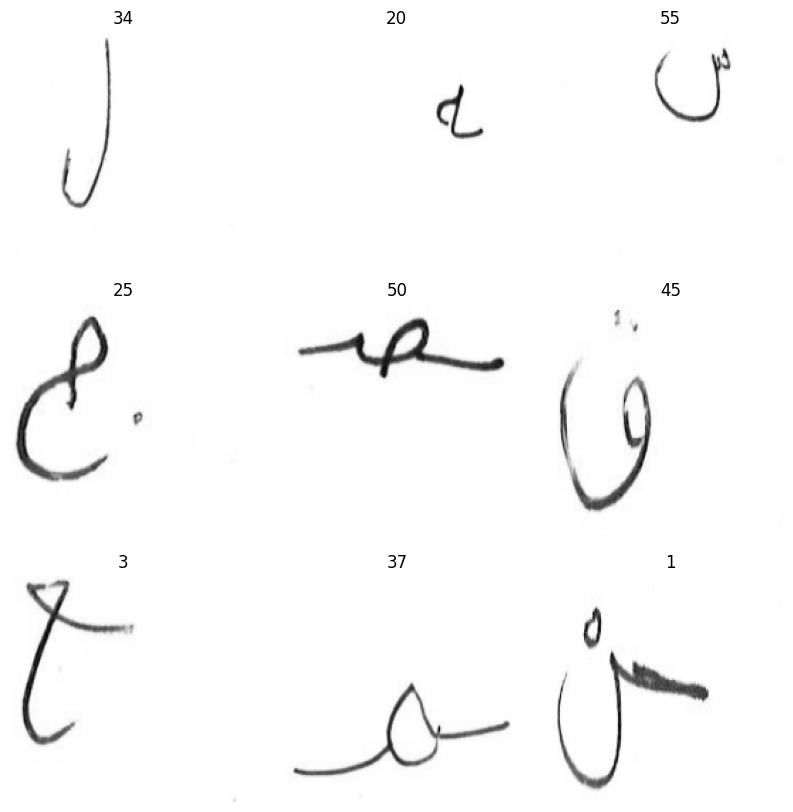

In [40]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [42]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(512, 160, 160, 1)
(512, 65)


- (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
- (Batch Size, Number of Classes)

## Model Definition:

In [51]:
from tensorflow.keras.layers import Resizing, Rescaling
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    # Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(160, 160, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),


    # Fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(65, activation='softmax')  # For classification into 1000 categories
])

### Model Summary:

In [52]:
model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (512, 160, 160, 1)        0         
                                                                 
 random_rotation_3 (RandomR  (512, 160, 160, 1)        0         
 otation)                                                        
                                                                 
 random_zoom_3 (RandomZoom)  (512, 160, 160, 1)        0         
                                                                 
 conv2d_76 (Conv2D)          (512, 160, 160, 32)       320       
                                                                 
 max_pooling2d_42 (MaxPooli  (512, 80, 80, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (512, 80, 80, 64)        

### Model Optimization:

In [53]:
learning_rate = 0.001
lr_mod = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps=100000,\
                                                             decay_rate=0.96, staircase=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_mod), loss = 'categorical_crossentropy', metrics=['accuracy'])

## Training the Model:

In [ ]:
h1 = model.fit(train_images,
              validation_data=train_validation,
              epochs=EPOCHS)

Epoch 1/50
67/67 [==============================] - 43s 468ms/step - loss: 4.1539 - accuracy: 0.0187 - val_loss: 3.9260 - val_accuracy: 0.0657
Epoch 2/50
67/67 [==============================] - 28s 387ms/step - loss: 3.5448 - accuracy: 0.1155 - val_loss: 2.3842 - val_accuracy: 0.3270
Epoch 3/50
67/67 [==============================] - 28s 381ms/step - loss: 2.4046 - accuracy: 0.3265 - val_loss: 1.3870 - val_accuracy: 0.5829
Epoch 4/50
67/67 [==============================] - 28s 385ms/step - loss: 1.6678 - accuracy: 0.5011 - val_loss: 0.9286 - val_accuracy: 0.7184
Epoch 5/50
67/67 [==============================] - 28s 380ms/step - loss: 1.2858 - accuracy: 0.6115 - val_loss: 0.7472 - val_accuracy: 0.7715
Epoch 6/50
67/67 [==============================] - 28s 386ms/step - loss: 1.0923 - accuracy: 0.6666 - val_loss: 0.6966 - val_accuracy: 0.7904
Epoch 7/50
67/67 [==============================] - 27s 377ms/step - loss: 0.9415 - accuracy: 0.7073 - val_loss: 0.5684 - val_accuracy: 0.8288

In [ ]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the Model:

Keras format:

In [ ]:
model.save('nn-arabic-handwriting-320210207.keras')

### Loading the Model:

In [ ]:
# model = tf.keras.models.load_model('nn-arabic-handwriting-320210207.keras')

## Prediction:

Loading the 'Test' dataset:

In [ ]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        label_mode="categorical",
        color_mode='grayscale',
        shuffle=False,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

In [ ]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

In [ ]:
for images in test_images:
    print(images.shape)
    break

In [ ]:
predictions = model.predict(test_images)

In [ ]:
img_list = os.listdir(datasets[1])

In [ ]:
labels_list = sorted(os.listdir(datasets[0]))
print(labels_list)

In [ ]:
predictions[1][22]

## Making 'predictions.csv':

In [ ]:
predictions.shape

In [ ]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [ ]:
print(predictions_mod)

In [ ]:
df_predictions.head()

In [ ]:
df_predictions.sort_values(by='ID', inplace=True)

In [ ]:
df_predictions.reset_index(drop=True)

In [ ]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 